In [36]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import math

# Define stock symbol and date range
symbol = "AAPL"
start_date = "2021-04-08"
end_date = "2023-05-01"

# Download stock data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)
#print(data)

# Retrieve the options chain data
data2 = yf.Ticker(symbol)
#print(len(data2.options))
DF_calls, DF_puts = data2.option_chain(data2.options[0])
print(DF_calls)
print(DF_puts)

# # Check the type of options (American or European)
# option_type = 'test'
# today = pd.Timestamp.today().date()
# if 'expiration' in DF_calls.columns:
#     if (DF_calls['expiration'].min().date() - today).days > 0:
#         option_type = 'American'
# elif 'expiration' in DF_puts.columns:
#     if (DF_puts['expiration'].min().date() - today).days > 0:
#         option_type = 'American'

# Print the type of options
#print(f"The options for {symbol} are {option_type} style.")
#print(DF_calls)

# Calculate log returns
returns = np.log(data["Adj Close"] / data["Adj Close"].shift(1)).dropna()
#print(returns)

# Estimate parameters of the GBM model
mu = returns.mean()
sigma = returns.std()

# Define simulation parameters
S0 = data["Adj Close"][-1] # current stock price
r = 0.05 # risk-free rate
T = 1/365 # time horizon
M = 500 # number of time steps
N = 1000 # number of simulations

# Simulate stock prices using GBM    #Uses Brownian motion!
dt = T / M
price_matrix = np.zeros((N, M+1))
price_matrix[:, 0] = S0
for i in range(N):
    for j in range(1, M+1):
        price_matrix[i, j] = price_matrix[i, j-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.normal())

#print(S0)


[*********************100%***********************]  1 of 1 completed
         contractSymbol             lastTradeDate  strike  lastPrice  bid  \
0   AAPL230505C00050000 2023-04-11 16:47:02+00:00    50.0     111.40  0.0   
1   AAPL230505C00065000 2023-04-13 15:45:19+00:00    65.0      98.70  0.0   
2   AAPL230505C00085000 2023-04-04 14:40:18+00:00    85.0      81.35  0.0   
3   AAPL230505C00090000 2023-04-26 13:32:49+00:00    90.0      73.52  0.0   
4   AAPL230505C00095000 2023-04-24 18:30:41+00:00    95.0      70.55  0.0   
5   AAPL230505C00100000 2023-04-28 18:12:17+00:00   100.0      68.53  0.0   
6   AAPL230505C00105000 2023-04-28 13:41:20+00:00   105.0      63.42  0.0   
7   AAPL230505C00110000 2023-04-28 19:05:28+00:00   110.0      58.95  0.0   
8   AAPL230505C00120000 2023-04-28 18:44:11+00:00   120.0      48.30  0.0   
9   AAPL230505C00125000 2023-04-27 19:09:07+00:00   125.0      43.27  0.0   
10  AAPL230505C00130000 2023-04-28 19:54:40+00:00   130.0      39.43  0.0   
11  AAP

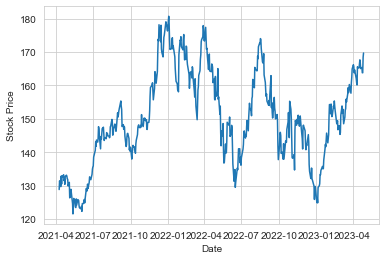

In [37]:
#print(data["Adj Close"])
a = data["Adj Close"]
fig, ax = plt.subplots()
ax.plot(a)
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price")
#ax.set_title("Simulated Stock Price")
plt.show()

In [38]:
options = data2.option_chain()
print(options)
#calls = options.calls
#calls
#print(S0)

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice  bid  \
0   AAPL230505C00050000 2023-04-11 16:47:02+00:00    50.0     111.40  0.0   
1   AAPL230505C00065000 2023-04-13 15:45:19+00:00    65.0      98.70  0.0   
2   AAPL230505C00085000 2023-04-04 14:40:18+00:00    85.0      81.35  0.0   
3   AAPL230505C00090000 2023-04-26 13:32:49+00:00    90.0      73.52  0.0   
4   AAPL230505C00095000 2023-04-24 18:30:41+00:00    95.0      70.55  0.0   
5   AAPL230505C00100000 2023-04-28 18:12:17+00:00   100.0      68.53  0.0   
6   AAPL230505C00105000 2023-04-28 13:41:20+00:00   105.0      63.42  0.0   
7   AAPL230505C00110000 2023-04-28 19:05:28+00:00   110.0      58.95  0.0   
8   AAPL230505C00120000 2023-04-28 18:44:11+00:00   120.0      48.30  0.0   
9   AAPL230505C00125000 2023-04-27 19:09:07+00:00   125.0      43.27  0.0   
10  AAPL230505C00130000 2023-04-28 19:54:40+00:00   130.0      39.43  0.0   
11  AAPL230505C00135000 2023-04-28 19:38:53+00:00   135.0     

In [39]:
import seaborn as sns
def histogram(a,values):
    xmin=np.min(a)
    xmax=np.max(a)
    print(xmin)
    print(xmax)
    L=100 #the number of segments
    Del=(xmax-xmin)/L
    bin_cents=[xmin+Del/2+k*Del for k in range(L)]
    bin_mins=[xmin+k*Del for k in range(L)]
    bin_maxs=[xmin+(k+1)*Del for k in range(L)]
    counts=np.zeros(L)
    for c1 in range(values):
        k=int(np.floor((a[c1]-xmin)/Del))
        if k>=L:
            counts[L-1]+=1
        else:
            counts[k]+=1
    sns.set_style('whitegrid')
    axes=sns.barplot(x=bin_cents,y=counts/values,palette='bright')
    axes.set(xlabel='Value',ylabel='Frequency')

In [40]:
# Plot simulated stock prices
#q = 0.02
# fig, ax = plt.subplots()
# ax.plot(price_matrix.T)
# ax.set_xlabel("Time")
# ax.set_ylabel("Stock Price")
# ax.set_title("Simulated Stock Price")
# plt.show()

(501, 1000)
169.19437233548658
170.23934546888358


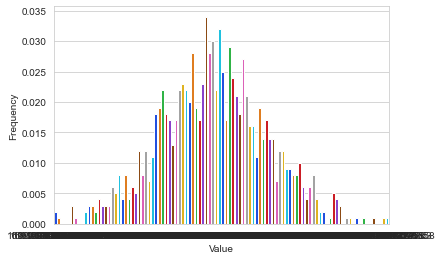

In [41]:
print(np.shape(price_matrix.T)) #Using Brownian motion
a = price_matrix.T
#print(price_matrix[:,365])
histogram(a[499,:],1000)

[[169.67999268 169.68025961 169.68456001 ... 169.68994474 169.68556013
  169.67656611]
 [169.67999268 169.67004018 169.69875449 ... 169.69659876 169.6860866
  169.68323487]
 [169.67999268 169.67705713 169.68728656 ... 169.68780356 169.68029705
  169.69419096]
 ...
 [169.67999268 169.84317058 169.5975474  ... 169.42178354 169.79449221
  169.60279232]
 [169.67999268 169.84755424 169.59835327 ... 169.43274491 169.77778837
  169.5986637 ]
 [169.67999268 169.85711549 169.60465434 ... 169.42990294 169.78518905
  169.57930937]]


Text(0.5, 1.0, 'Geometric Brownian Motion')

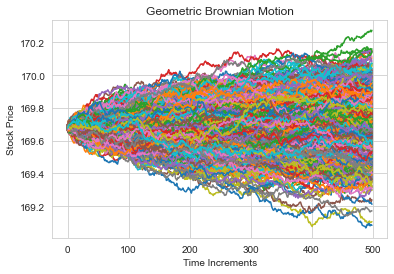

In [42]:
def geo_paths(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps
    #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2)*dt + sigma*np.sqrt(dt) * np.random.normal(size=(steps,N))),axis=0)
    
    return np.exp(ST)

q = 0.03
paths= geo_paths(S0,T,r, q,sigma,M,N)

paths[:,0] = S0
print(paths)

plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")

In [43]:
# print(np.shape(paths))
# #print(price_matrix[:,365])
# plt.hist(paths[4,:],50)
# print(np.min(paths[4,:]))
# plt.show()

In [44]:
def black_scholes_call(S,K,T,r,q,sigma):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # call_price = value of the option 
    """
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / sigma*np.sqrt(T)
    d2 = d1 - sigma* np.sqrt(T)
    
    call = S * np.exp(-q*T)* norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
    return call

In [45]:
#S = 100 #stock price S_{0}
#K = 110 # strike
K = 130
T = 1/365 # time to maturity
#r = 0.05 # risk free risk in annual %
q = 0.03 # annual dividend rate
#sigma = 0.25 # annual volatility in %
#steps = 10 # time steps
steps = M
N = 1000 # number of trials

payoffs = np.maximum(paths[-1]-K, 0)
#print(payoffs)
option_price = np.mean(payoffs)*np.exp(-r*T) #discounting back to present value

bs_price = black_scholes_call(S0,K,T,r,q,sigma)

print(f"Black Scholes Price is {bs_price}")
print(f"Simulated price is {option_price}")

Black Scholes Price is 30.700240525287782
Simulated price is 39.68458055319047


In [46]:
def binomial_european_call(S, K, T, r, q, sigma, N):
    """ 
    This function prices European call options using the binomial model.
    Input parameters:
    S : float : initial stock price
    K : float : strike price
    T : float : time to expiration (in years)
    r : float : risk-free interest rate
    sigma : float : volatility
    N : int : number of time steps
    Output:
    float : option price
    """
    dt = T / N
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    p = (math.exp((r -q) * dt) - d) / (u - d)

    # Download the historical data of the stock
    symbol = "AAPL"
    start_date = "2019-01-01"
    end_date = "2022-01-01"
    stock_data = yf.download(symbol, start=start_date, end=end_date)

    # Calculate the daily returns of the stock
    stock_data["Returns"] = stock_data["Adj Close"].pct_change()
    print(stock_data["Returns"])
    # Calculate the daily volatility of the stock
    daily_volatility = stock_data["Returns"].std()

    # Annualize the volatility
    annual_volatility = daily_volatility * math.sqrt(252)

    # Calculate the expected return of the stock
    expected_return = stock_data["Returns"].mean()

    # Calculate the risk-free rate
    risk_free_rate = 0.02

    # Adjust the parameters for the binomial model
    u = math.exp((expected_return - 0.5 * annual_volatility ** 2) * dt + annual_volatility * math.sqrt(dt))
    d = math.exp((expected_return - 0.5 * annual_volatility ** 2) * dt - annual_volatility * math.sqrt(dt))
    p = (math.exp(risk_free_rate * dt) - d) / (u - d)

    # Calculate the stock prices at each node
    stock_prices = []
    for i in range(N+1):
        stock_prices.append(S * u**(N-i) * d**(i))

    # Calculate the option prices at expiration
    option_values = [max(0, stock_prices[i] - K) for i in range(N+1)]

    # Calculate the option prices at earlier time steps
    for n in range(N-1, -1, -1):
        for i in range(n+1):
            option_values[i] = math.exp(-risk_free_rate*dt) * (p * option_values[i] + (1-p) * option_values[i+1])

    return option_values[0],stock_prices

In [47]:
bi_price,arr = binomial_european_call(S0,K,T,r,q,sigma,steps)

[*********************100%***********************]  1 of 1 completed
Date
2019-01-02         NaN
2019-01-03   -0.099608
2019-01-04    0.042690
2019-01-07   -0.002226
2019-01-08    0.019063
                ...   
2021-12-27    0.022975
2021-12-28   -0.005767
2021-12-29    0.000502
2021-12-30   -0.006578
2021-12-31   -0.003535
Name: Returns, Length: 757, dtype: float64


In [48]:
print(bi_price)

39.68711576830381


In [49]:
np.shape(paths)

(500, 1000)

In [50]:
#print(arr)

In [51]:
print(paths)

[[169.67999268 169.68025961 169.68456001 ... 169.68994474 169.68556013
  169.67656611]
 [169.67999268 169.67004018 169.69875449 ... 169.69659876 169.6860866
  169.68323487]
 [169.67999268 169.67705713 169.68728656 ... 169.68780356 169.68029705
  169.69419096]
 ...
 [169.67999268 169.84317058 169.5975474  ... 169.42178354 169.79449221
  169.60279232]
 [169.67999268 169.84755424 169.59835327 ... 169.43274491 169.77778837
  169.5986637 ]
 [169.67999268 169.85711549 169.60465434 ... 169.42990294 169.78518905
  169.57930937]]


In [52]:
print(price_matrix)

[[169.67999268 169.67680513 169.66178214 ... 169.82601879 169.83084323
  169.84704787]
 [169.67999268 169.67384929 169.67045991 ... 169.80304385 169.80279333
  169.80061932]
 [169.67999268 169.68134965 169.67847719 ... 169.5003174  169.49177921
  169.47606146]
 ...
 [169.67999268 169.6681331  169.66237769 ... 169.96177382 169.95765558
  169.95395449]
 [169.67999268 169.67531425 169.67465033 ... 169.77820949 169.78529416
  169.79349969]
 [169.67999268 169.67457674 169.69624195 ... 169.72561613 169.71409447
  169.72206374]]
